### Clustering


##### kümeleme: örnekleri benzerlerine göre gruplama 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('cars.csv')

In [45]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [46]:
df['Cylinder'].unique()

array([6, 8, 4], dtype=int64)

In [47]:
df['Liter'].unique()

array([3.1, 3.6, 3.8, 5.7, 2.8, 4.6, 1.6, 2.2, 6. , 3.5, 3.4, 1.8, 2. ,
       2.3, 2.5, 3. ])

In [48]:
df['Liter'].nunique()

16

In [49]:
df['Doors'].unique()

array([4, 2], dtype=int64)

In [50]:
df['Cruise'].unique()

array([1, 0], dtype=int64)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [52]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [53]:
x = df[['Price', 'Mileage', 'Cylinder']]
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


### modelling

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [55]:
model = KMeans(n_clusters=4, random_state=41)

In [56]:
model.fit(x)

c:\Users\ahmi_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=41)

In [57]:
predict = model.predict(x)

In [58]:
x['Cluster']= predict

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_8052\1251756180.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,1
1,17542.036083,9135,6,1
2,16218.847862,13196,6,1
3,16336.913140,16342,6,1
4,16339.170324,19832,6,3


In [60]:
silhouette_score(x, x['Cluster'])

0.4132861036468492

<Axes: xlabel='Price', ylabel='Mileage'>

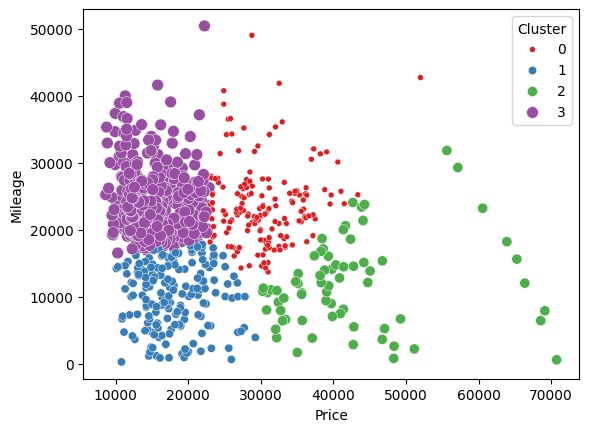

In [61]:
sns.scatterplot(x=x['Price'], y=x['Mileage'], hue=x['Cluster'], size=x['Cluster'], palette='Set1')

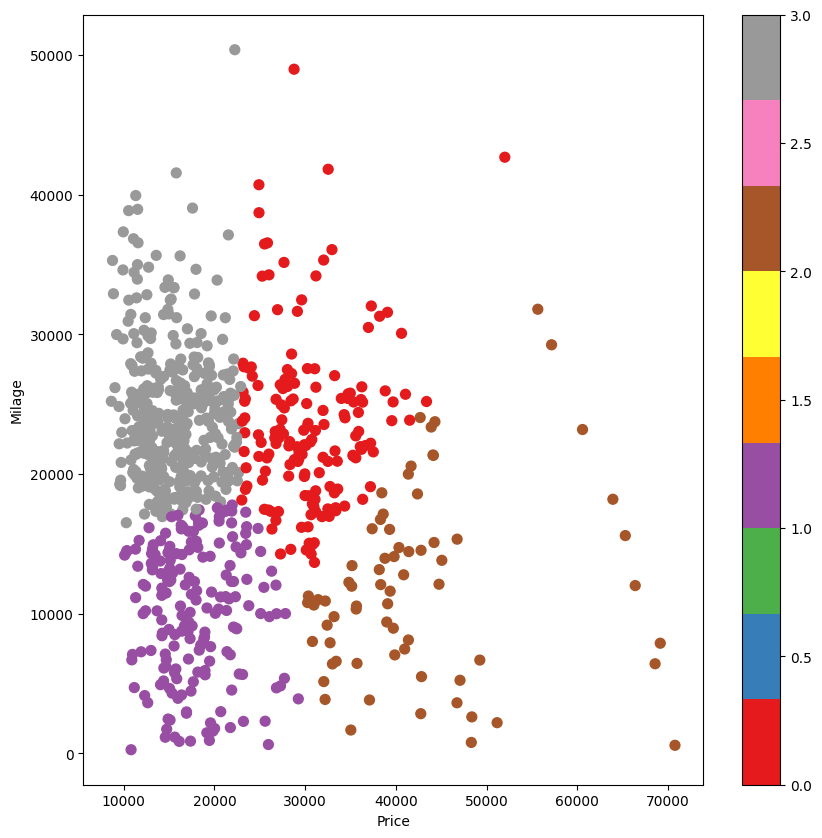

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(x['Price'], x['Mileage'], c=x['Cluster'], s=50, cmap='Set1');
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()

In [63]:
import plotly.graph_objects as go

# Plotly grafik objesini oluştur
fig = go.Figure()
#fig size
fig.update_layout(width=800, height=800)


# 3D scatter plot ekleyin
fig.add_trace(go.Scatter3d(
    x=x['Price'],
    y=x['Mileage'],
    z=x['Cylinder'],
    mode='markers',
    marker=dict(
        size=5, # Noktaların boyutu
        color=x['Cluster'], # Her bir noktanın rengi, Cluster sütununa göre
        colorscale='Viridis', # Renk skalası
        opacity=0.8
    )
))

# Grafik başlığı ve eksen etiketlerini ayarlayın
fig.update_layout(
    title='3D Kümeleme Görselleştirme',
    scene = dict(
        xaxis_title='Fiyat',
        yaxis_title='Kilometre',
        zaxis_title='Silindir'
    )
)

# Grafik göster
fig.show()